In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(3)
class K_Mean :
    def __init__ (self,n_clusters, max_iters):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        
    def fit(self,X):

        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.X = X

        X_centroid  = self._init_centroid()
        y_pred = self._Assign_Cluster(X_centroid)
        actual_iters = 0
        for i in range(self.max_iters): 
            actual_iters +=1
            old_y_pred = y_pred.copy()
            new_centroid  = self._New_Centroid(y_pred)
            y_pred = self._Assign_Cluster(new_centroid)
            if self._is_converged(y_pred, old_y_pred):
                break    
        self.actual_iters = actual_iters
        self.y_pred = y_pred
        self.new_centroid = new_centroid
        self.WCV = self.WCV(new_centroid)
    def WCV(self, centroid):
        Wcv = 0
        for i in range(self.n_samples) :
            Wcv +=  np.min(np.sum(np.square(self.X[i]  - centroid), axis =1))   
        return Wcv
    
    def _init_centroid(self) :
        return self.X[np.random.choice(self.X.shape[0],self.n_clusters, replace=False)]
    
    def _Assign_Cluster(self, X_centroid) :
        dist = []
        for i in range(self.n_clusters) :
            dist.append(np.sqrt(np.sum(np.square(self.X-X_centroid[i]),axis = 1)))
        dist = np.array(dist).T
        y_pred = dist.argmin(axis = 1 )
        return y_pred
    
    def _New_Centroid(self,y_pred) :
        new_centroid = np.zeros((self.n_clusters, self.n_features))
        for k in range(self.n_clusters):
            new_centroid[k] = np.mean(self.X[y_pred == k], axis = 0)
        return new_centroid
    
    def _is_converged (self,new_y , old_y ):
        return (new_y == old_y).all()

        
    
        
        

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:

data.drop_duplicates(inplace=True)

In [6]:

X = data.iloc[:, [2, 3]].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
np.random.seed(42)

### 1. Hãy dùng thuật toán K-mean để chọn ra số cụm thích hợp (như trong slide bài giảng) dựa trên tập training, và dự đoán label của các quan sát trên tập testing của bộ dữ liệu bên dưới.

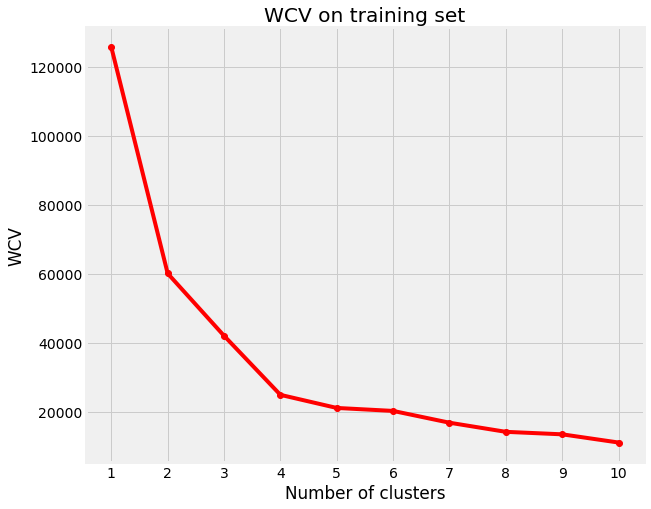

In [7]:
WCV = []
for n_cluster in range(1,11):
    model = K_Mean(n_clusters = n_cluster, max_iters= 1000)
    model.fit(X_train)
    WCV.append(model.WCV)
    
list_num_cluster = np.arange(1,11)
list_WCV = np.array(WCV)

plt.figure(figsize = (10,8))
plt.style.use("fivethirtyeight")
plt.title('WCV on training set')
plt.xlabel('Number of clusters')
plt.xticks(range(1,11))
plt.ylabel('WCV')
plt.plot(list_num_cluster, list_WCV,'ro-');

Ở đây ta thấy rằng chọn số cluster = 4 là thích hợp vì ở đó biểu đồ có hình dạng elbow.

In [14]:
cluster = 4
model_X_test = K_Mean(n_clusters = cluster, max_iters= 300)
model_X_test.fit(X_test)


print('Cluster centroid : \n', model_X_test.new_centroid)
print()
print('Predicted label : \n',model_X_test.y_pred)


Cluster centroid : 
 [[35.21428571 26.35714286]
 [39.         89.82352941]
 [24.46666667 60.93333333]
 [51.85       57.95      ]]

Predicted label : 
 [2 0 0 1 3 2 2 1 1 0 3 1 1 2 1 1 3 1 3 2 2 0 1 3 2 3 2 3 2 2 0 0 3 2 1 3 2
 2 1 3 3 1 0 0 3 1 0 0 1 3 2 1 0 3 3 3 3 3 1 3 1 2 0 0 0 3]


### 2. Vẽ hình các cụm trên tập testing


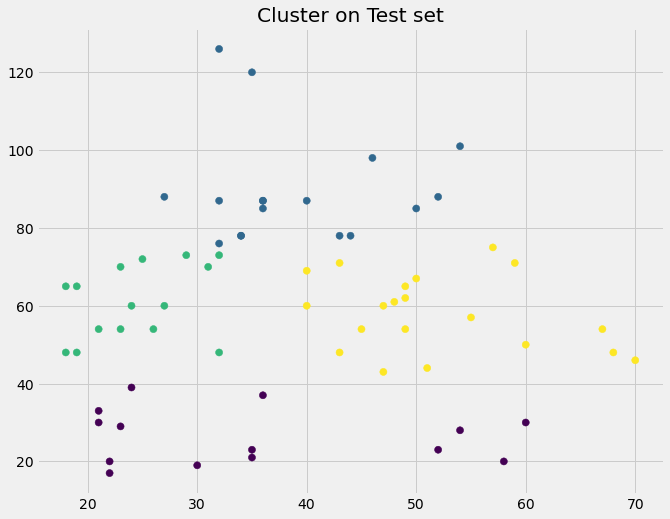

In [15]:

plt.figure(figsize = (10,8))
plt.title('Cluster on Test set')
plt.scatter(X_test[:,0],X_test[:,1], c = model_X_test.y_pred, s= 50);